In [1]:
%load_ext watermark
%watermark

Last updated: 2021-04-21T20:49:33.430171+02:00

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.21.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [26]:
%matplotlib inline 

plt.rcParams['figure.figsize'] = (10,10) #10 inch for both the height and width for all plots

### Data Reading

In [27]:
vehicles = pd.read_pickle("../data/vehicles.3.clustered_variables.pkl")

In [28]:
vehicles.dtypes

manufacturer                 object
model                        object
year                          int64
displ                       float64
cylinders                   float64
transmission                 object
drive_wheels                 object
Class                      category
fuelType                     object
consumption                   int64
CO2_emissions               float64
drive                      category
types_motor_size           category
types_consumption          category
co2_type                   category
consumption_litres_mile     float64
dtype: object

### Count by multiple groups

In [29]:
vehicles.head()

,manufacturer,model,year,displ,cylinders,transmission,drive_wheels,Class,fuelType,consumption,CO2_emissions,drive,types_motor_size,types_consumption,co2_type,consumption_litres_mile
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic,two,Special Vehicles,Normal,17,522.764706,two,small,large,large,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very large,very large,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic,two,Special Vehicles,Normal,16,555.437500,two,small,large,large,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic,two,Special Vehicles,Normal,13,683.615385,two,large,very large,very large,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic,two,Medium Cars,Premium,16,555.437500,two,large,large,large,0.236588


In [30]:
def pivot_count(df, rows,columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field,
                             index=rows,
                             columns=columns,
                             aggfunc= np.size
                             ).dropna(axis=0, how = 'all')
    return df_pivot

In [31]:
fuel_consumption = pivot_count(vehicles, "fuelType","types_consumption","year" )
fuel_consumption

types_consumption,very small,small,medium,large,very large
fuelType,,,,,
Gasoline or E85,88,168,272,221,466
Normal,5707,4930,5735,3158,4565
Others,415,131,199,255,98
Premium,1443,2258,3874,1154,1649


In [48]:
def heatmap_count_type(df, col1, col2):
    pivot_table = pivot_count(df, col1,col2,"year")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    sns.plt.ylabel(col1)
    sns.plt.xlabel(col2)
plt.show()

interactive(children=(Dropdown(description='col1', options=('manufacturer', 'model', 'year', 'displ', 'cylinde…

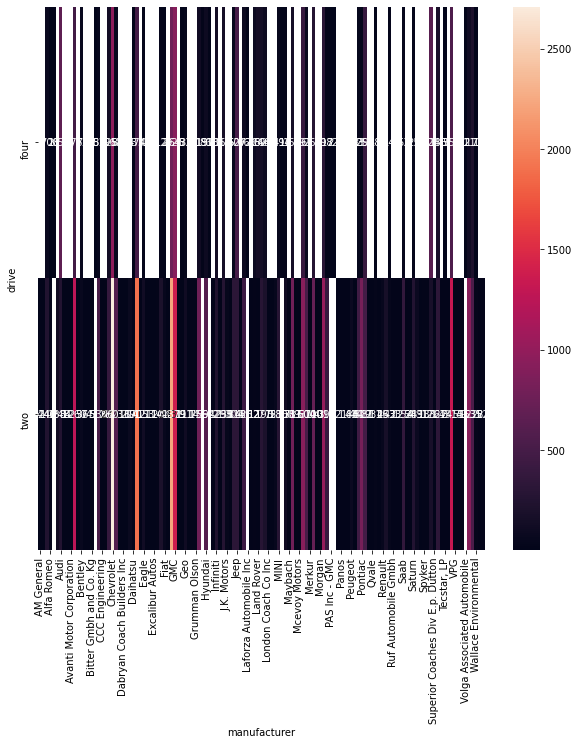

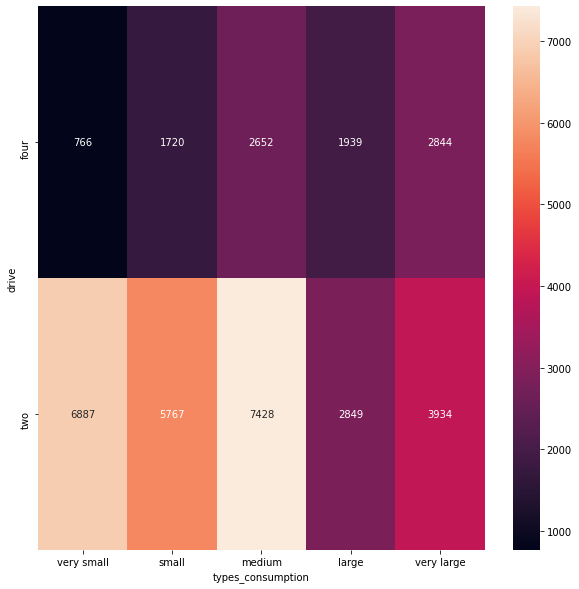

In [49]:
interact(heatmap_count_type, col1=vehicles.columns, col2=vehicles.columns, df=fixed(vehicles));

### Conclusions 

· There exist more low consumption two-wheel cars than four-wheel 
· The manufacturers concentrate more on vehicles of small/low-consumption-engine and very-large-engine/high-consumption
· The major part of cars are automatic regarding transmission, meanwhile small cars have similar values for both,  manual and automatic
· Certain trucks are the most polluting type of vehicle 

### Mean by categorical variables

In [50]:
def mean_by_categorical(col_group, col_calculation):
    vehicles.groupby(col_group)[col_calculation].mean().plot.barh()
    plt.ylabel(col_group)
    plt.xlabel('Mean values of {}'.format(col_calculation))
    plt.show()

In [52]:
numerical_columns = vehicles.select_dtypes(['int64','float64']).columns
categorical_columns = vehicles.select_dtypes(['object','category']).columns
columns_type = [col for col in vehicles.columns if col.endswith("_type")]

In [53]:
interact(mean_by_categorical,col_group=categorical_columns,col_calculation=numerical_columns);

interactive(children=(Dropdown(description='col_group', options=('manufacturer', 'model', 'transmission', 'dri…

In [55]:
vehicles['Class'].unique()

['Special Vehicles', 'Medium Cars', 'Small Cars', 'Sport Car', 'Station', 'Large Cars', 'Van', 'Trucks']
Categories (8, object): ['Special Vehicles', 'Medium Cars', 'Small Cars', 'Sport Car', 'Station', 'Large Cars', 'Van', 'Trucks']

### Conclusions

· Automatic cars has slightly higher CO2 and consumption levels 
· Vans and wagons present the highest consumtption (round 0.25 litres/miles). On the other hand, small and medium cars showed the shortest consumtion levels (0.15 litres/mile)
· Hybrid vehicles emit a 50% less CO2 than any other vehicles (with similar emissions) 

### Mean by multiple types

In [56]:
def pivot_mean(rows,columns,calc_field):
    df_pivot= vehicles.pivot_table(values=calc_field,
                                  index=rows,
                                  columns=columns,
                                  aggfunc=np.mean,
                                  ).dropna(axis=0,how='all')
    return df_pivot

In [57]:
pivot_mean("fuelType", "types_consumption", "CO2_emissions")

types_consumption,very small,small,medium,large,very large
fuelType,,,,,
Gasoline or E85,339.130097,406.088834,468.786323,541.794217,630.329401
Normal,328.380777,406.992477,469.697560,538.449897,658.979013
Others,338.220218,462.803106,531.665784,599.017402,655.866952
Premium,333.172630,408.977710,469.329393,540.583769,675.693617


In [58]:
def heatmap_mean_types(col1,col2,col3):
    pivot_table = pivot_mean(col1,col2,col3)
    sns.heatmap(pivot_table, annot=True, fmt='g')
    sns.plt.ylabel(col1)
    sns.plt.xlabel(col2)
    plt.show()

interactive(children=(Dropdown(description='col1', options=('manufacturer', 'model', 'year', 'displ', 'cylinde…

<function __main__.heatmap_mean_types(col1, col2, col3)>

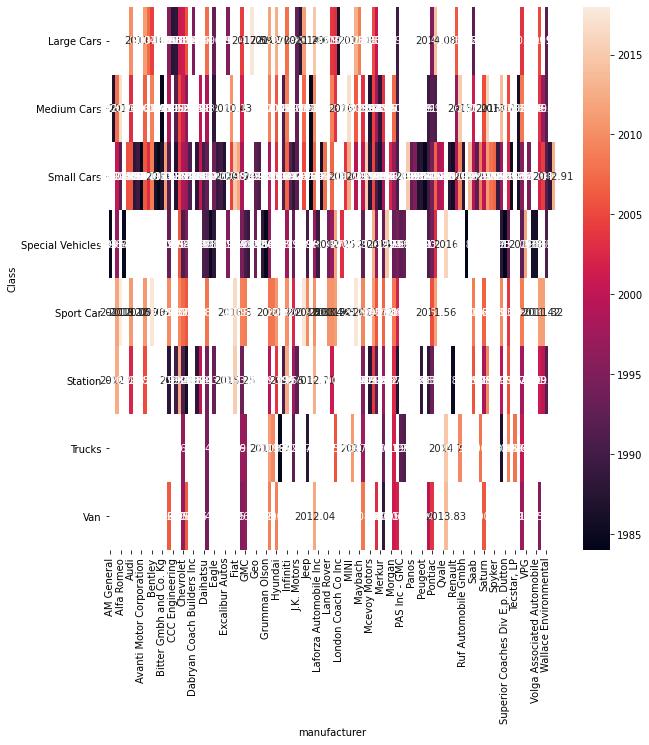

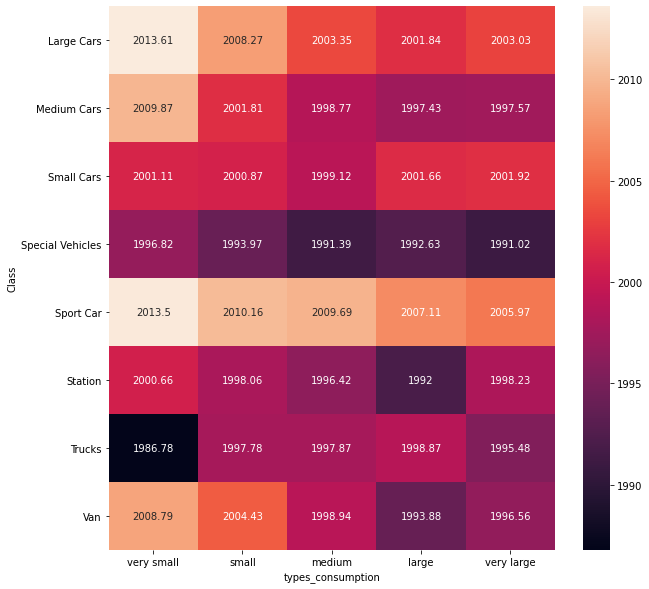

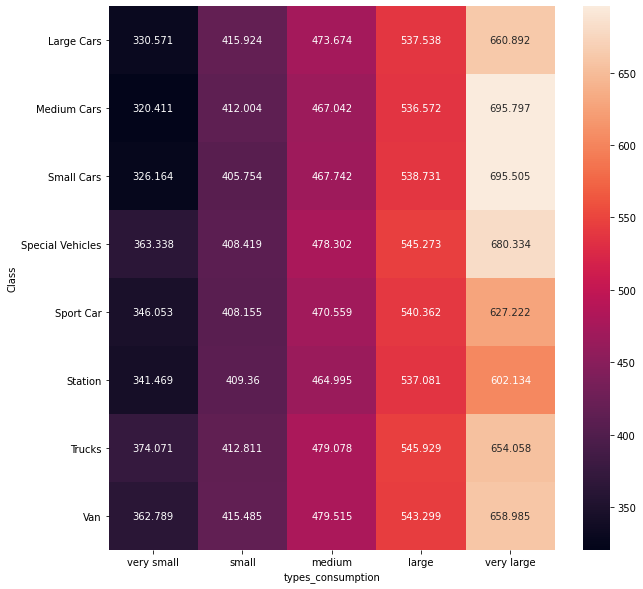

In [59]:
interact(heatmap_mean_types, col1=vehicles.columns, col2=vehicles.columns, col3=numerical_columns)

### Conclusions

· Van with Premium gasoline consume 38% more than small vehicles with same fuel type.

### Trend comparation (temporary)

On this dataset, we have a temporary variable year. We checked before but makes sense to observe again.
We can consider it an ordinal variable (since is not a continuous variable).
For this evolution, linear charts are the best fit.  

In [60]:
vehicles_bef_2017 = vehicles.query("year<2017")

<AxesSubplot:xlabel='year'>

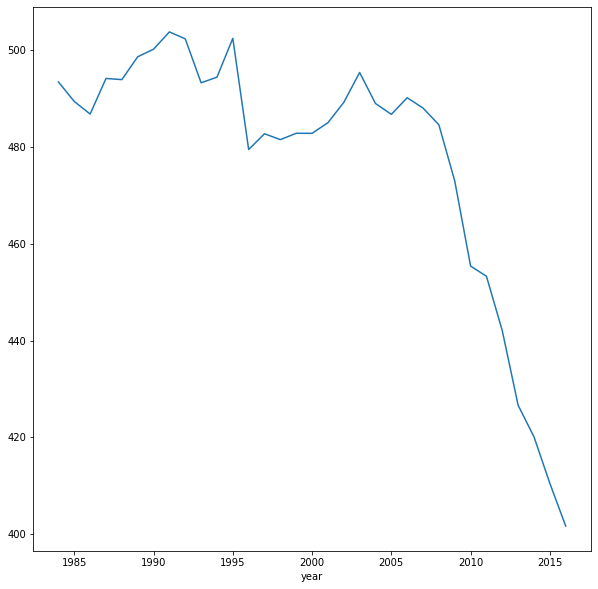

In [61]:
vehicles_bef_2017.groupby('year')['CO2_emissions'].mean().plot()

General trend over CO2 emissions has been reduced throughout

In [62]:
def mean_evolution(col_calculation):
    vehicles_bef_2017.groupby('year')[col_calculation].mean().plot()
    plt.show()

In [63]:
interact(mean_evolution, col_calculation=numerical_columns)

interactive(children=(Dropdown(description='col_calculation', options=('year', 'displ', 'cylinders', 'consumpt…

<function __main__.mean_evolution(col_calculation)>

Historically, cylinders trend has been raising (and displ.) over the time until 2010, the trend reverses since then.
The variables are linearly dependent

<AxesSubplot:xlabel='cylinders', ylabel='displ'>

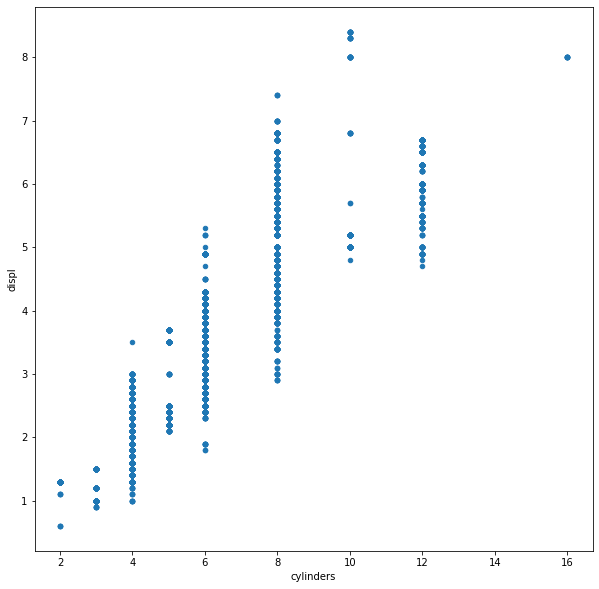

In [64]:
vehicles.plot.scatter(x="cylinders", y="displ")

In [67]:
def count_evolution(col_calculation):
    for category in vehicles_bef_2017[col_calculation].unique():
        n_vehicles_category_year = vehicles_bef_2017[vehicles_bef_2017[col_calculation]==category].groupby(
        'year').apply(np.size)
        plt.plot(
        n_vehicles_category_year.index,
        n_vehicles_category_year,
        label=category
        )
        plt.legend()

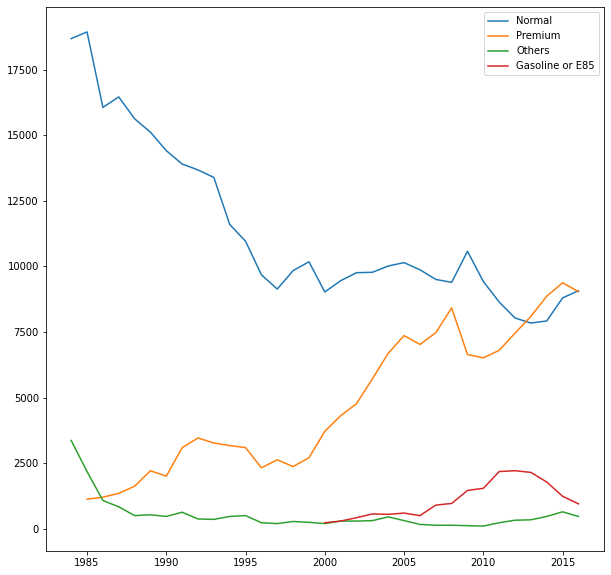

In [68]:
count_evolution("fuelType")

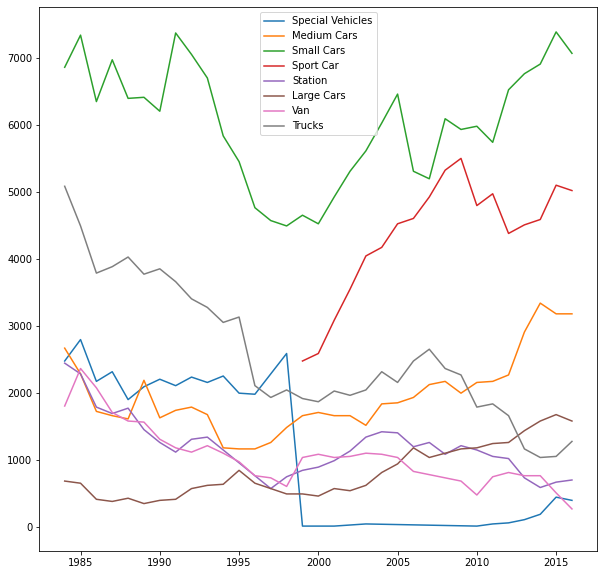

In [69]:
count_evolution("Class")

Once data anlysis, the final step is to compile all the information obtained. The document points two main goals:

    - To inform those people interested on discoverings founded. 
    - To ease the replication of the analysis by other Data Scientists

In [70]:
vehicles.dtypes

manufacturer                 object
model                        object
year                          int64
displ                       float64
cylinders                   float64
transmission                 object
drive_wheels                 object
Class                      category
fuelType                     object
consumption                   int64
CO2_emissions               float64
drive                      category
types_motor_size           category
types_consumption          category
co2_type                   category
consumption_litres_mile     float64
dtype: object

## Conclusion of the analysis

#### Description

The dataset consist of relevant information of US cars sold since 1985. Information contain technical aspects (cylinders, transmission type) and environmental details (fuel consumption, CO2 emissions)

The original dataset can be found at: https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip The dataset used is a lighter version of the original (less columns)

Original dataset description http://www.fueleconomy.gov/feg/ws/index.shtml#ft7

The entities of the dataset are:

    · Manufacturer
    · Manufacturer-model
    · Manufacturer-model-year
    · Manufacturer-year
    
The variables of the dataset are:

    manufacturer                 object
    model                        object
    year                          int64
    displ                       float64
    cylinders                   float64
    transmission                 object
    drive_wheels                 object
    Class                      category
    fuelType                     object
    consumption                   int64
    CO2_emissions               float64
    drive                      category
    types_motor_size           category
    types_consumption          category
    co2_type                   category
    consumption_litres_mile     float64

#### QA

    · Displ, cylinders, transmission and drive_wheels variables contains non-existent values
    · There exist an outlier found on the quantity of cars for the year 2018
    · There exist hybrid cars and electrical cars (the later have been removed because they do not emit pollution)
    · Consumption variable is defined by miles per galon and CO2_emissions by grames per mile. Since CO2 is the main variable of the dataset, we have created the variable contumption_litres_mile which is defined as liters by miles in order to be able to compare it with CO2

#### Variables distribution

    · Any numerical variable follows a normal
    · Cylinders, a numerical variable, present a distribution of discretes values not balanced (cylinders 2,4,8 sum up to 95%)
    · The largest Manufacturer is Chrysler (10% of total volume)
    · 65% of cars use regular gasoline
    · Distribution of motor size, consumption and CO2 are balanced along the range
    · 70% of cars are two-wheel drive
    · Two thirds of cars are automatic
    · The largest class of vehicles by volume is 'small class' (35% over total)

#### Comparations

    · Low-consumption vehicles tends to be two-wheel drive rather than four.
    · Manufacturers concentrat their efforts of construction on small-engine/low-consumption cars and very-large-engine/large-consumption
    · Certain trucks are the most polluting cars from any other kind of car.
    · Automatic cars showed slighly higher values for CO2 and consumption variables
    · Vans and trucks present the highest consumption (round 0.25 litres/mile). Meanwhile, small and medium cars gather the less consumption values (0.15 litres/mile)
    · CO2 values are similar regardless the fuel type
    · Premium gasoline vans consume a 38% more than smaller vehicles with the same kind of fuel
    · Consumption and CO2 emissions have been descending since 1985
    · Historically, displacement has been raising on manufactured cars until 2010, where the trend is reversed.
    
    